In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')


In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
962,ham,"Watching cartoon, listening music &amp; at eve...",NaN,NaN,NaN
3361,ham,No messages on her phone. I'm holding it now,NaN,NaN,NaN
3488,ham,I'm also came to room.,NaN,NaN,NaN
5495,ham,"Good afternoon, my love ... How goes your day ...",NaN,NaN,NaN
2646,ham,"Em, its olowoyey@ usc.edu have a great time in...",NaN,NaN,NaN


## 1. Data Cleaning


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
df.sample(5)

,v1,v2
1100,ham,You busy or can I come by at some point and fi...
868,spam,Hello. We need some posh birds and chaps to us...
4775,ham,Quite lor. But dun tell him wait he get compla...
4529,ham,Don't forget though that I love you .... And I...
3347,ham,"Sorry, I'll call later"


In [7]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1628,ham,Yes princess! I want to make you happy...
3485,ham,"Yeah, probably earlier than that"
2219,spam,You have WON a guaranteed å£1000 cash or a å£2...
5440,ham,Thank you. do you generally date the brothas?
5483,ham,So li hai... Me bored now da lecturer repeatin...


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df['target'] = encoder.fit_transform(df['target'])

In [10]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
# check for duplicate values
df.duplicated().sum()

403

In [13]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

## 2. EDA

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

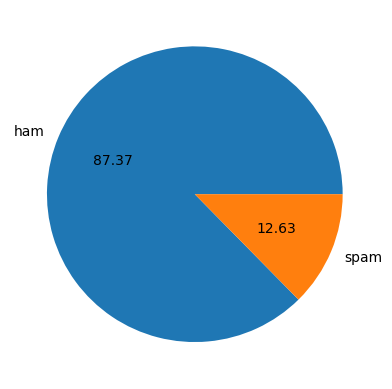

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [19]:
import re

# Character count
df['num_characters'] = df['text'].apply(len)

# Word count using regex
df['num_words'] = df['text'].apply(lambda x: len(re.findall(r'\b\w+\b', x)))

# Sentence count using simple punctuation-based split
df['num_sentences'] = df['text'].apply(lambda x: len(re.findall(r'[.!?]+', x)) + 1 if x.strip() else 0)

# View results
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,4
1,0,Ok lar... Joking wif u oni...,29,6,3
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33,2
3,0,U dun say so early hor... U c already then say...,49,11,3
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,1


In [20]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.989940,2.846779
std,58.236293,11.518372,1.745441
min,2.000000,0.000000,1.000000
25%,36.000000,8.000000,2.000000
50%,60.000000,12.000000,3.000000
75%,117.000000,23.000000,4.000000
max,910.000000,190.000000,40.000000


In [21]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.600974,2.692648
std,56.358207,11.448193,1.681598
min,2.000000,0.000000,1.000000
25%,34.000000,7.000000,2.000000
50%,52.000000,11.000000,2.000000
75%,90.000000,19.000000,3.000000
max,910.000000,190.000000,40.000000


In [22]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,25.595712,3.912711
std,30.137753,6.185684,1.806610
min,13.000000,2.000000,1.000000
25%,132.000000,24.000000,3.000000
50%,149.000000,27.000000,4.000000
75%,157.000000,29.000000,5.000000
max,224.000000,40.000000,10.000000


In [23]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

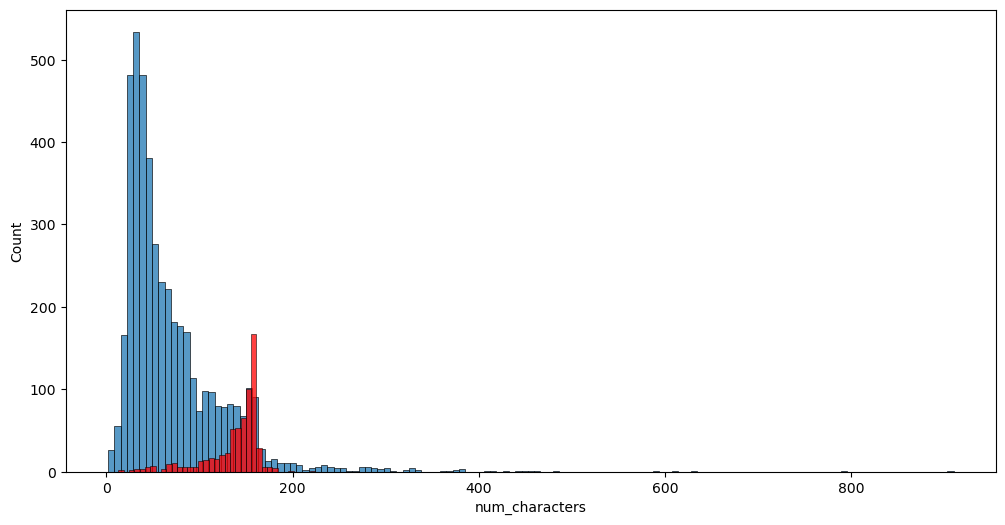

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

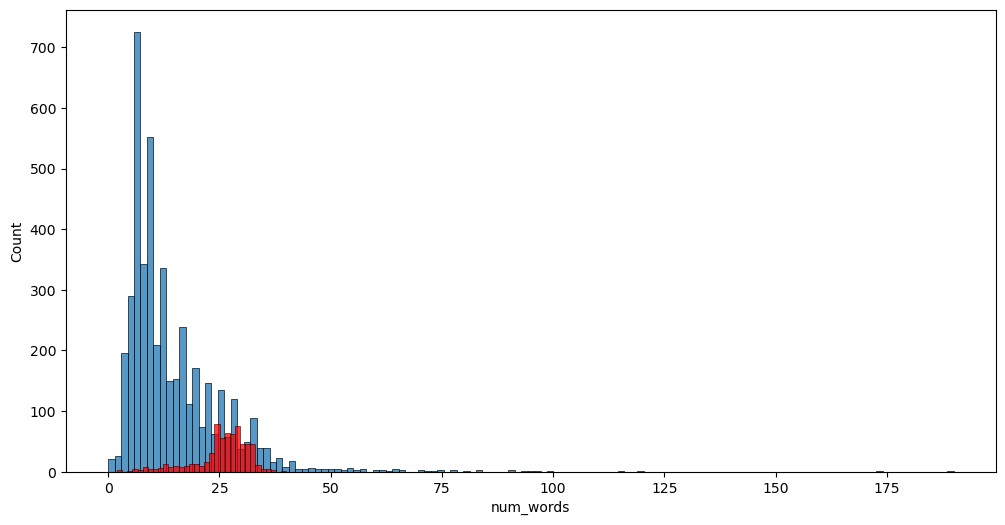

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

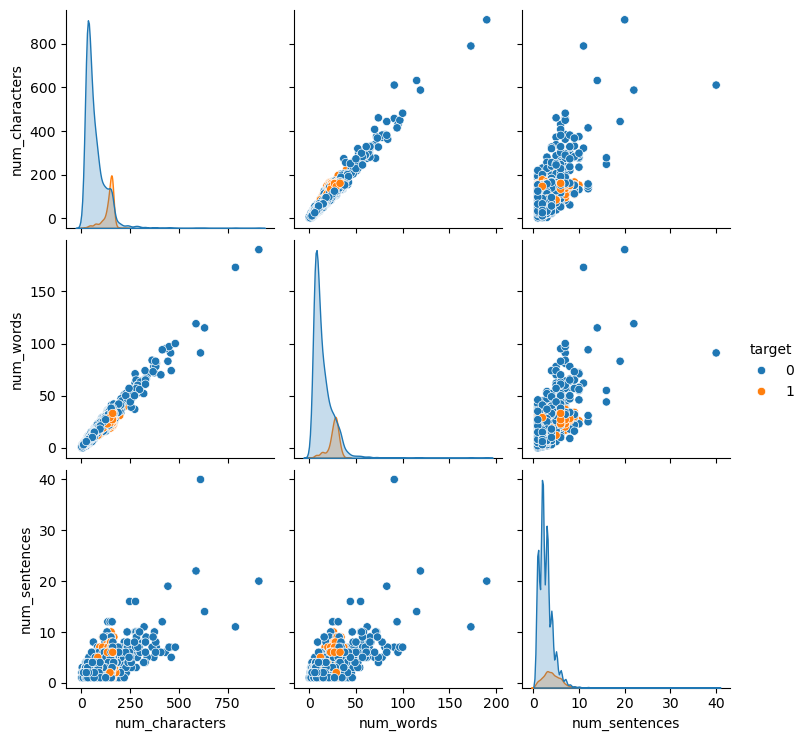

In [26]:
sns.pairplot(df ,hue='target')

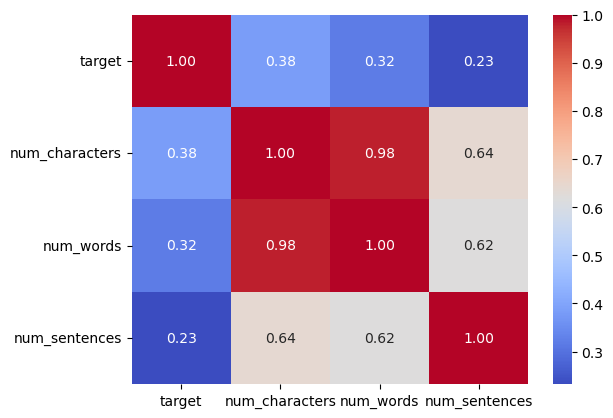

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'target' is treated as numeric and include it in the correlation calculation
numeric_df = df[['target', 'num_characters', 'num_words', 'num_sentences']]

# Calculate the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap with annotations
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 10})

# Display the plot
plt.show()


### 3. Data Preprocessing

- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming


In [28]:
import re
import string
from collections import Counter

# A simple list of common English stopwords
stopwords = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 
    'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 
    'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 
    'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 
    'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 
    'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 
    'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 
    'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 
    'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 
    'can', 'will', 'just', 'don', 'should', 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', 'couldn', 
    'didn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'ma', 'mightn', 'mustn', 'needn', 'shan', 'shouldn', 'wasn', 
    'weren', 'won', 'wouldn'
])

# Function to remove punctuation (using string.punctuation) and stopwords, and apply stemming
def transform_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize the text (splitting by spaces)
    words = text.split()

    # Initialize list for processed words
    processed_words = []

    # Process each word
    for word in words:
        # Remove punctuation using regex
        word = re.sub(r'[^a-zA-Z0-9]', '', word)
        
        # Skip stopwords and empty words
        if word and word not in stopwords:
            # Apply a simple stemming technique (e.g., strip 'ing', 'es', etc.)
            if word.endswith('ing'):
                word = word[:-3]
            elif word.endswith('es'):
                word = word[:-2]
            elif word.endswith('ed'):
                word = word[:-2]
            
            processed_words.append(word)
    
    # Join the processed words into a single string and return
    return " ".join(processed_words)


In [29]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'im gonna home soon dont want talk stuff anymore tonight k ive cri enough today'

In [30]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [31]:
import re

# Simple custom stemming function
def custom_stem(word):
    # Handle 'ing' suffix
    if word.endswith('ing') and len(word) > 4:  # Only remove 'ing' if the word is long enough
        word = word[:-3]
    
    # Handle 'ed' suffix
    elif word.endswith('ed') and len(word) > 3:  # Only remove 'ed' if the word is long enough
        word = word[:-2]
    
    # Handle 'es' suffix
    elif word.endswith('es') and len(word) > 3:  # Only remove 'es' if the word is long enough
        word = word[:-2]
    
    # Handle plural 's' suffix
    elif word.endswith('s') and len(word) > 2:  # Only remove 's' if the word is long enough
        word = word[:-1]
    
    return word

# Sample words
words = ["loving", "running", "jumped", "bikes", "cats"]

# Apply custom stemming
stemmed_words = [custom_stem(word) for word in words]
print(stemmed_words)


['lov', 'runn', 'jump', 'bik', 'cat']


In [32]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,4
1,0,Ok lar... Joking wif u oni...,29,6,3
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33,2
3,0,U dun say so early hor... U c already then say...,49,11,3
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,1


In [33]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [34]:
print(df.columns)


Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences'], dtype='object')


In [35]:
# Assuming 'text' is the original column and you want to apply the transformation
df['transformed_text'] = df['text'].apply(transform_text)

# Now generate the word cloud for 'target' == 1
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))


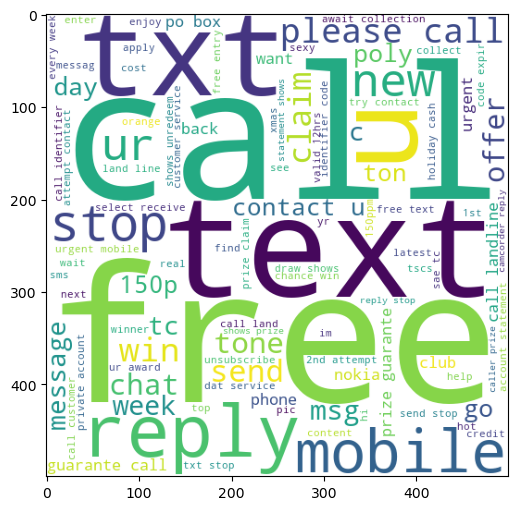

In [36]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [37]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

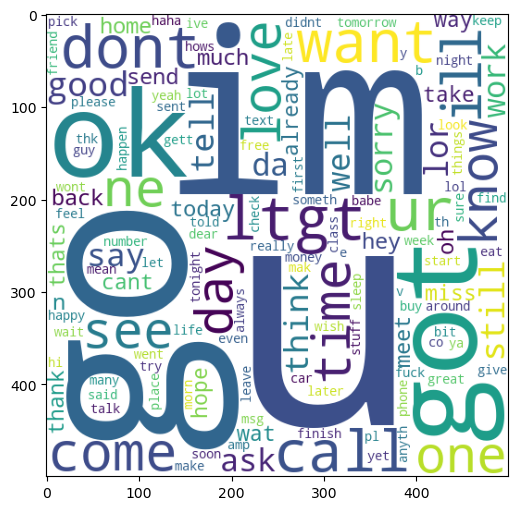

In [38]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [39]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,4,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,6,3,ok lar jok wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,11,3,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,1,nah dont think go usf liv around though


In [40]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [41]:
len(spam_corpus)

10803

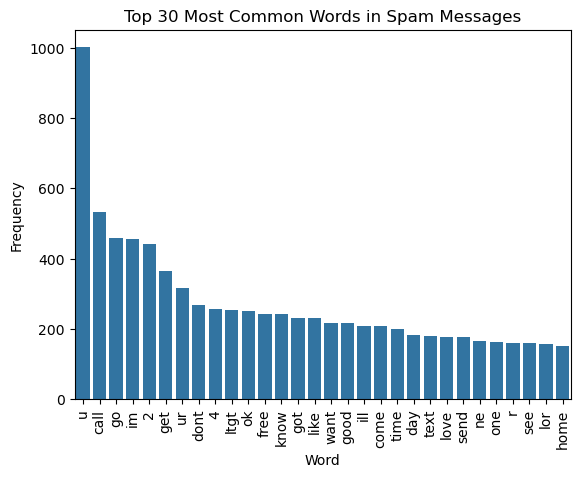

In [42]:
# Assuming 'spam_corpus' is a list of words from your transformed text
# You can create spam_corpus like this if not done already:
spam_corpus = " ".join(df['transformed_text']).split()  # Create corpus from transformed text

# Count the frequency of words
word_counts = Counter(spam_corpus)

# Get the 30 most common words
common_words = word_counts.most_common(30)

# Create a DataFrame with the word and its frequency
df_common_words = pd.DataFrame(common_words, columns=["Word", "Frequency"])

# Plotting
sns.barplot(x="Word", y="Frequency", data=df_common_words)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Top 30 Most Common Words in Spam Messages')  # Optional: Title for the plot
plt.show()

In [43]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [44]:
len(ham_corpus)

36719

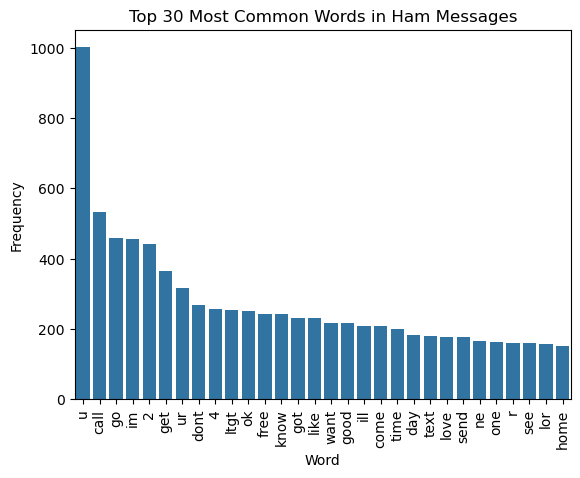

In [45]:
ham_corpus = " ".join(df['transformed_text']).split()  # Create corpus from transformed text

# Count the frequency of words
word_counts = Counter(ham_corpus)

# Get the 30 most common words
common_words = word_counts.most_common(30)

# Create a DataFrame with the word and its frequency
df_common_words = pd.DataFrame(common_words, columns=["Word", "Frequency"])

# Plotting
sns.barplot(x="Word", y="Frequency", data=df_common_words)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Top 30 Most Common Words in Ham Messages')  # Optional: Title for the plot
plt.show()

In [46]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,4,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,6,3,ok lar jok wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,11,3,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,1,nah dont think go usf liv around though


## 4. Model Building

In [47]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [48]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [49]:
X.shape

(5169, 3000)

In [50]:
y = df['target'].values

In [51]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [55]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [56]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [57]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[791 105]
 [ 23 115]]
0.5227272727272727


In [58]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9729206963249516
[[896   0]
 [ 28 110]]
1.0


In [59]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9825918762088974
[[896   0]
 [ 18 120]]
1.0


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [61]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [62]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [63]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [64]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9777562862669246, 0.9752066115702479)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9777562862669246
Precision -  0.9752066115702479
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9729206963249516
Precision -  1.0
For  DT
Accuracy -  0.9332688588007737
Precision -  0.8415841584158416
For  LR
Accuracy -  0.9516441005802708
Precision -  0.9489795918367347
For  RF
Accuracy -  0.9680851063829787
Precision -  0.981651376146789


c:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.972921,1.000000
5,RF,0.968085,0.981651
0,SVC,0.977756,0.975207
8,ETC,0.975822,0.974790
10,xgb,0.970986,0.965517
4,LR,0.951644,0.948980
6,AdaBoost,0.961315,0.945455
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.874016


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.972921
2,RF,Accuracy,0.968085
3,SVC,Accuracy,0.977756
4,ETC,Accuracy,0.975822
5,xgb,Accuracy,0.970986
6,LR,Accuracy,0.951644
7,AdaBoost,Accuracy,0.961315
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


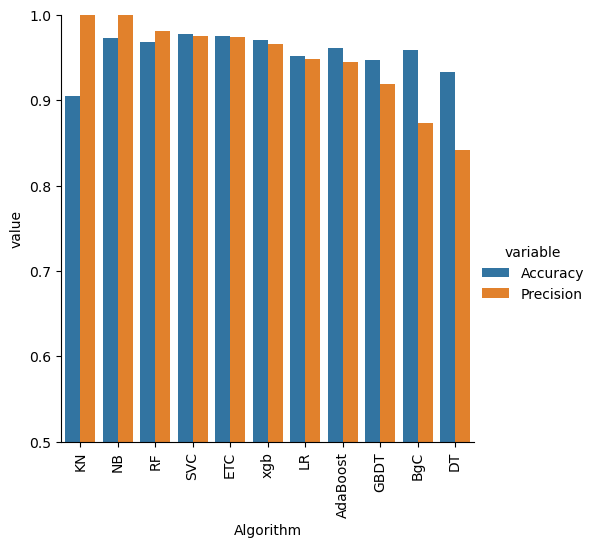

In [ ]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
## improve the model

# 1. Change the max_features parameter of TfIdf

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [ ]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [ ]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.972921,1.000000,0.972921,1.000000,0.972921,1.000000,0.972921,1.000000
2,RF,0.968085,0.981651,0.968085,0.981651,0.968085,0.981651,0.968085,0.981651
3,SVC,0.977756,0.975207,0.977756,0.975207,0.977756,0.975207,0.977756,0.975207
4,ETC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
5,xgb,0.970986,0.965517,0.970986,0.965517,0.970986,0.965517,0.970986,0.965517
6,LR,0.951644,0.948980,0.951644,0.948980,0.951644,0.948980,0.951644,0.948980
7,AdaBoost,0.961315,0.945455,0.961315,0.945455,0.961315,0.945455,0.961315,0.945455
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.874016,0.958414,0.874016,0.958414,0.874016,0.958414,0.874016


In [ ]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.9833333333333333


In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9680851063829787
Precision 0.981651376146789


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))